In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_Cars = pd.read_csv("Test_data.csv", sep=';')
print(df_Cars.shape)
df_Cars

(30000, 7)


merkkiSelvakielinen                                      mallimerkinta  \
0                  Toyota            TOYOTA COROLLA Farmari (AC) 4ov 1798cm3   
1                  Nissan  Nissan Qashqai Monikäyttöajoneuvo (AF) 4ov 133...   
2                   Skoda                      SUPERB Sedan (AA) 5ov 1968cm3   
3                   Skoda           OCTAVIA SCOUT Farmari (AC) 5ov 1968cm3 A   
4                  Toyota           TOYOTA YARIS Viistoperä (AB) 4ov 1490cm3   
...                   ...                                                ...   
29995              Nissan    Nissan Micra Monikäyttöajoneuvo (AF) 4ov 999cm3   
29996               Skoda                  OCTAVIA Farmari (AC) 5ov 999cm3 A   
29997              Toyota           TOYOTA YARIS Viistoperä (AB) 4ov 1490cm3   
29998              Toyota     TOYOTA YARIS CROSS Viistoperä (AB) 4ov 1490cm3   
29999               Dacia                    DUSTER Farmari (AC) 5ov 1332cm3   

       iskutilavuus  WLTP_Co2  kayttoonottopvm     fuelType        City  
0              1798       112             2021       Petrol      Vantaa  
1              1332       145             2021       Petrol  Nurmijärvi  
2              1968       124             2021  Diesel fuel    Helsinki  
3              1968       151             2021  Diesel fuel     Tammela  
4              1490        87             2021       Petrol      Vantaa  
...             ...       ...              ...          ...         ...  
29995           999       121             2022       Petrol    Helsinki  
29996           999       119             2022       Petrol  Orimattila  
29997          1490        87             2022       Petrol    Helsinki  
29998          1490       101             2022       Petrol   Järvenpää  
29999          1332       154             2022       Petrol    Helsinki  

[30000 rows x 7 columns]

In [3]:
df_Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   merkkiSelvakielinen  30000 non-null  object
 1   mallimerkinta        30000 non-null  object
 2   iskutilavuus         30000 non-null  int64 
 3   WLTP_Co2             30000 non-null  int64 
 4   kayttoonottopvm      30000 non-null  int64 
 5   fuelType             30000 non-null  object
 6   City                 30000 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.6+ MB


In [4]:
df_Cars.isnull().sum()

merkkiSelvakielinen    0
mallimerkinta          0
iskutilavuus           0
WLTP_Co2               0
kayttoonottopvm        0
fuelType               0
City                   0
dtype: int64

### 1- Which are the most common 5 makes (brands) having largest number of obs ? Show as chart and table, both frequency and % share of entire data. Make clear and informative visualisation.

In [5]:
def Bar_Lable(plot,N_Fraction):
    for p in plot.patches:
        plot.annotate(format(p.get_height(), N_Fraction), 
                      (p.get_x() + p.get_width() / 2, p.get_height()+(p.get_height()/50)),
                      ha='center', va='center') 

Number of Make Toyota is : 7552 and in percentage is : 25.17
Number of Make Kia is : 3124 and in percentage is : 10.41
Number of Make Skoda is : 2963 and in percentage is : 9.88
Number of Make Volkswagen; VW is : 2722 and in percentage is : 9.07
Number of Make Ford is : 1733 and in percentage is : 5.78


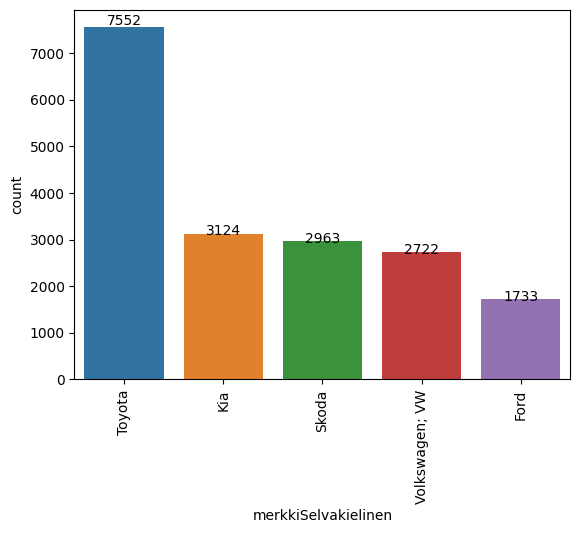

In [6]:
plot = sns.countplot(x='merkkiSelvakielinen', data=df_Cars, order = df_Cars['merkkiSelvakielinen'].value_counts().head(5).index)
Bar_Lable(plot,'.0f')

n = df_Cars['merkkiSelvakielinen'].value_counts().head(5).index
n_all = len(df_Cars)

lst_Make=[]
lst_Num=[]
lst_Percentage=[]

for i in n:
    n_Make = len(df_Cars[(df_Cars['merkkiSelvakielinen'] == i)])
    print(f"Number of Make {i} is : {n_Make} and in percentage is : {round((n_Make / n_all)*100, 2)}")
    lst_Make.append(i)
    lst_Num.append(n_Make)
    lst_Percentage.append(round((n_Make / n_all)*100, 2))

data = pd.DataFrame({'Make': lst_Make, 'Number': lst_Num, 'Percentage': lst_Percentage})
plt.xticks(rotation=90)
plt.show()

In [7]:
styled_data = data.style

# Apply some styles
styled_data = styled_data.format({'Number': '{}', 'Percentage': '{:.2f}'})  # Format numeric values
styled_data = styled_data.set_caption("Frequency and Percentage Table")
styled_data = styled_data.set_table_styles([{
    'selector': 'caption',
    'props': [('font-size', '18px'), ('color', 'blue')] }])
styled_data = styled_data.background_gradient(cmap='coolwarm', axis=None, subset=['Number', 'Percentage'])
styled_data = styled_data.highlight_max(axis=0, color='lightgreen', subset=['Number', 'Percentage'])
styled_data = styled_data.set_properties(subset=['Make'], **{'text-align': 'center'})
styled_data = styled_data.set_table_styles([{
    'selector': 'td',
    'props': [('color', 'red')] }])

styled_data

### Use the long make-model description field.
2- Make model description has number of doors (like 4ov). Create new numerical column doors having numerical value for number of doors. Show as chart the distribution of number of doors separately for registration years 2021 and 2022

In [8]:
# Extract Number Of doors 
df_Cars['position'] = df_Cars['mallimerkinta'].str.find('ov ')
# Select one character before the position (if position is not -1)
df_Cars['Num_Door'] = df_Cars.apply(lambda row: int(row['mallimerkinta'][row['position'] - 1]) if row['position'] >= 1 else '', axis=1)
df_Cars.drop('position', axis=1, inplace=True)
df_Cars.head(5)

merkkiSelvakielinen                                      mallimerkinta  \
0              Toyota            TOYOTA COROLLA Farmari (AC) 4ov 1798cm3   
1              Nissan  Nissan Qashqai Monikäyttöajoneuvo (AF) 4ov 133...   
2               Skoda                      SUPERB Sedan (AA) 5ov 1968cm3   
3               Skoda           OCTAVIA SCOUT Farmari (AC) 5ov 1968cm3 A   
4              Toyota           TOYOTA YARIS Viistoperä (AB) 4ov 1490cm3   

   iskutilavuus  WLTP_Co2  kayttoonottopvm     fuelType        City  Num_Door  
0          1798       112             2021       Petrol      Vantaa         4  
1          1332       145             2021       Petrol  Nurmijärvi         4  
2          1968       124             2021  Diesel fuel    Helsinki         5  
3          1968       151             2021  Diesel fuel     Tammela         5  
4          1490        87             2021       Petrol      Vantaa         4

In [9]:
pd.crosstab(df_Cars['kayttoonottopvm'], df_Cars['Num_Door'], margins=True).style.background_gradient(cmap='summer_r')

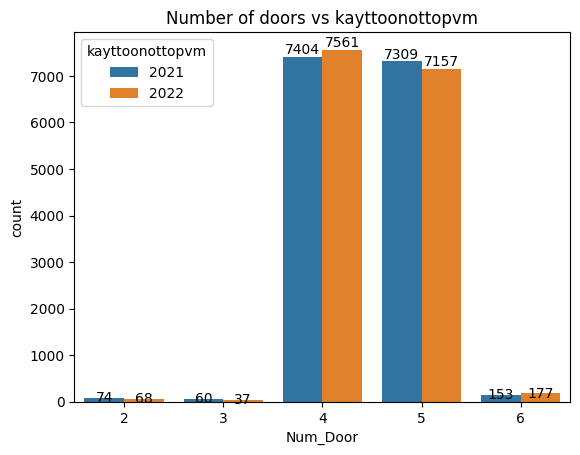

In [10]:
df = df_Cars.groupby(['kayttoonottopvm','Num_Door']).size().reset_index(name='count')
plot = sns.barplot(x=df['Num_Door'], y=df['count'], hue=df['kayttoonottopvm'])
Bar_Lable(plot,'.0f')
plt.title('Number of doors vs kayttoonottopvm')
plt.show()

### 3- A) Describe visually the relationship of engine size and CO2 as graph by fuel type.

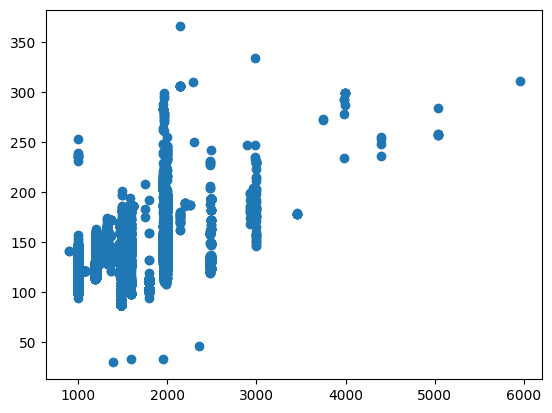

In [11]:
plt.scatter(df_Cars['iskutilavuus'],df_Cars['WLTP_Co2'])

In [12]:
def scatter_plot(x):
    sns.scatterplot(x=df_Cars[x], y=df_Cars['fuelType'],hue=df_Cars['fuelType'])    
    plt.title(x + ' vs Fuel Type')
    plt.ylabel('Fuel Type')
    plt.xlabel(x)
    plt.xticks(rotation=90)

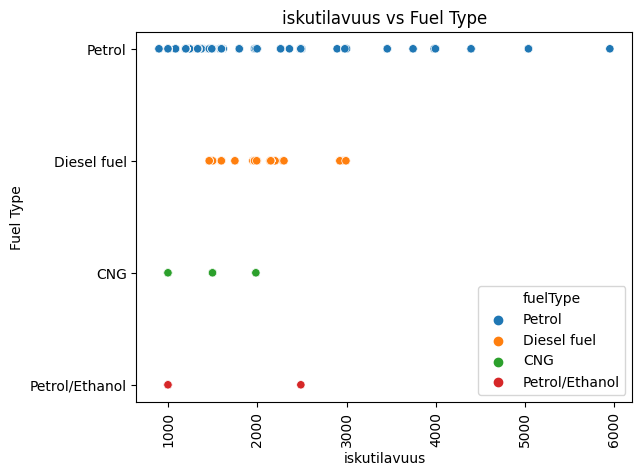

In [13]:
scatter_plot('iskutilavuus')

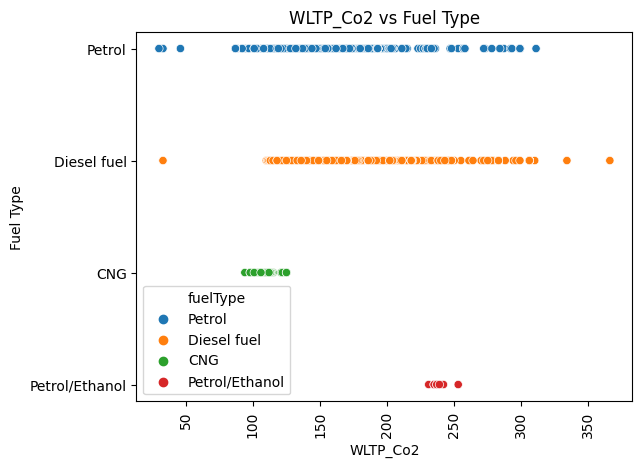

In [14]:
scatter_plot('WLTP_Co2')

### 3- B) Make prediction model that predicts the CO2 based on the displacement and fuel type. Show data having those predictions (real CO2 and prediction). Report the accuracy of the model as R2 and as correlation plot between actual CO2 and prediction. Interprete the results.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [16]:
df_Cars = pd.get_dummies(df_Cars, columns=['fuelType'], drop_first=True)

In [17]:
df_Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   merkkiSelvakielinen      30000 non-null  object
 1   mallimerkinta            30000 non-null  object
 2   iskutilavuus             30000 non-null  int64 
 3   WLTP_Co2                 30000 non-null  int64 
 4   kayttoonottopvm          30000 non-null  int64 
 5   City                     30000 non-null  object
 6   Num_Door                 30000 non-null  int64 
 7   fuelType_Diesel fuel     30000 non-null  uint8 
 8   fuelType_Petrol          30000 non-null  uint8 
 9   fuelType_Petrol/Ethanol  30000 non-null  uint8 
dtypes: int64(4), object(3), uint8(3)
memory usage: 1.7+ MB


In [18]:
X = df_Cars[['iskutilavuus', 'Num_Door', 'fuelType_Diesel fuel', 'fuelType_Petrol','fuelType_Petrol/Ethanol']]
y = df_Cars['WLTP_Co2']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)

In [22]:
results = pd.DataFrame({'Actual CO2': y_test, 'Predicted CO2': y_pred})

R2 Score: 0.22575514484390513


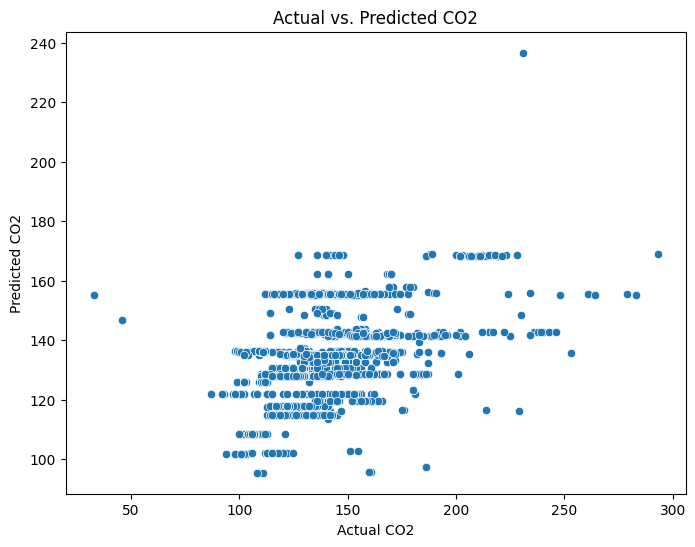

In [23]:
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=results, x='Actual CO2', y='Predicted CO2')
plt.xlabel('Actual CO2')
plt.ylabel('Predicted CO2')
plt.title('Actual vs. Predicted CO2')
plt.show()

R2 Score: 0.7492809947021621


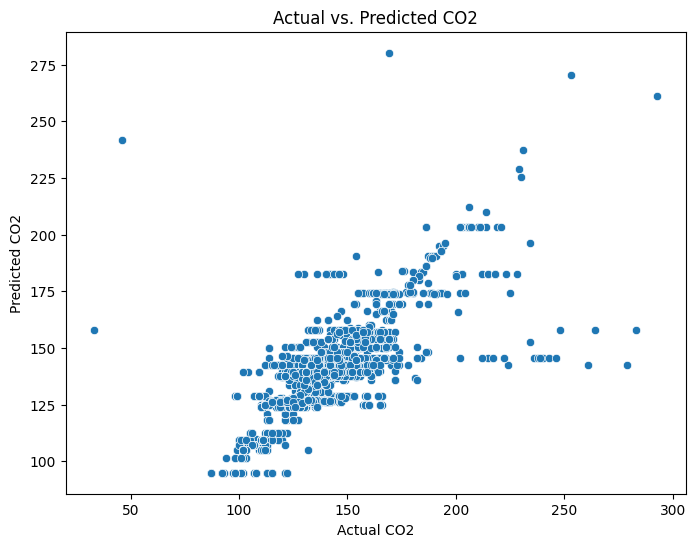

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

# Create a DataFrame to store actual CO2 and predicted CO2
results = pd.DataFrame({'Actual CO2': y_test, 'Predicted CO2': y_pred})

# Create a correlation plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results, x='Actual CO2', y='Predicted CO2')
plt.xlabel('Actual CO2')
plt.ylabel('Predicted CO2')
plt.title('Actual vs. Predicted CO2')
plt.show()

R2 Score: 0.7469104360990768


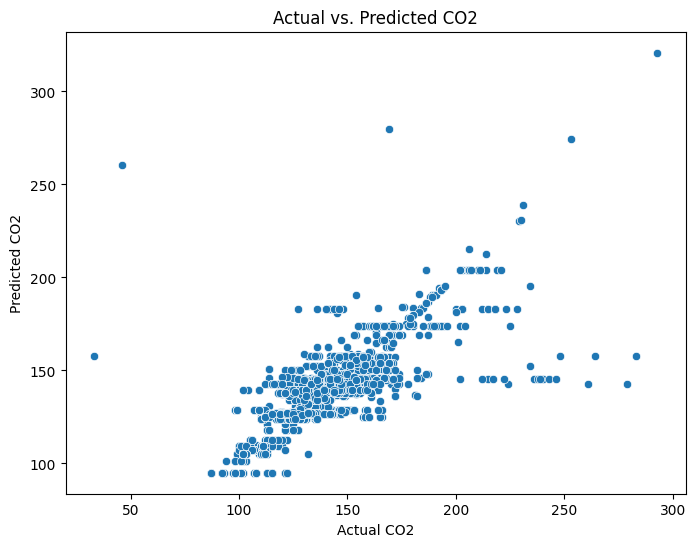

In [25]:
import xgboost as xgb

# Initialize and train an XGBoost regressor model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

# Create a DataFrame to store actual CO2 and predicted CO2
results = pd.DataFrame({'Actual CO2': y_test, 'Predicted CO2': y_pred})

# Create a correlation plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results, x='Actual CO2', y='Predicted CO2')
plt.xlabel('Actual CO2')
plt.ylabel('Predicted CO2')
plt.title('Actual vs. Predicted CO2')
plt.show()

## This part was not in questions. I had extra time and I did for my self to complete my exam time

### I created a word cloud to show most common N makes (brands) 

Text(0.5, 1.0, 'Word Cloud in the Shape of World Map')

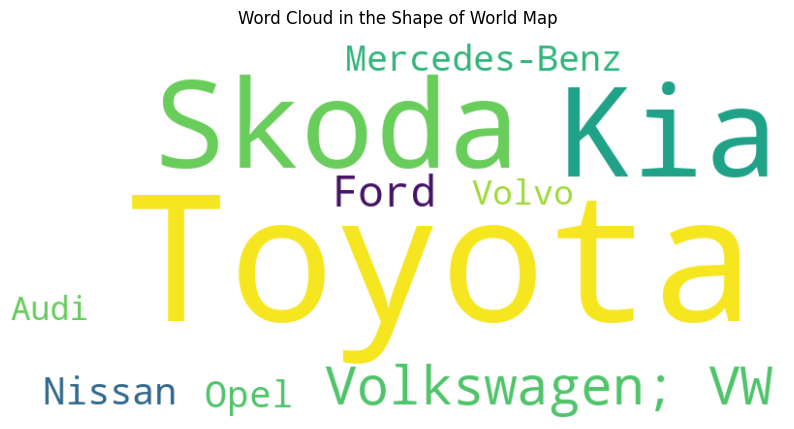

In [26]:
from wordcloud import WordCloud
from PIL import Image
from collections import Counter

word_counts = Counter(df_Cars['merkkiSelvakielinen'])

# Select the top N words
N = 10
top_words = word_counts.most_common(N)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white")
wordcloud.generate_from_frequencies(dict(top_words))

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud in the Shape of World Map')

#### To cluster cars based on location and display them on a map, I utilized a file containing latitude and longitude coordinates of cities. I then merged these location data with the main data frame. Subsequently, I employed the Folium library for clustering and displaying the results on the map.

In [27]:
df_lat_lng = pd.read_csv("fi-cities-lat-lon.csv", encoding="latin1")
print(df_lat_lng.shape)
df_lat_lng.head(5)

(442, 9)


city      lat      lng  country iso2       admin_name  capital  \
0  Helsinki  60.1708  24.9375  Finland   FI          Uusimaa  primary   
1   Tampere  61.4981  23.7600  Finland   FI        Pirkanmaa    admin   
2     Espoo  60.2056  24.6556  Finland   FI          Uusimaa    minor   
3     Turku  60.4500  22.2667  Finland   FI  Varsinais-Suomi    admin   
4    Vantaa  60.2944  25.0403  Finland   FI          Uusimaa    minor   

   population  population_proper  
0   1268296.0           664921.0  
1    334112.0           225118.0  
2    297132.0           297132.0  
3    252468.0           187604.0  
4    214605.0           214605.0

In [28]:
df_Cars_lat_lng = df_Cars.merge(df_lat_lng[['city','lat','lng']], left_on='City', right_on='city', how='left')

# Drop the duplicate "City" column if needed
df_Cars_lat_lng = df_Cars_lat_lng.drop(columns=['city'])

In [29]:
df_Cars_lat_lng.isna().sum()

merkkiSelvakielinen         0
mallimerkinta               0
iskutilavuus                0
WLTP_Co2                    0
kayttoonottopvm             0
City                        0
Num_Door                    0
fuelType_Diesel fuel        0
fuelType_Petrol             0
fuelType_Petrol/Ethanol     0
lat                        54
lng                        54
dtype: int64

In [30]:
df_Cars_lat_lng['lat'][(df_Cars_lat_lng['lat'].isnull())] = 60.1708
df_Cars_lat_lng['lng'][(df_Cars_lat_lng['lng'].isnull())] = 24.9375

In [31]:
df_Cars_lat_lng.isna().sum()

merkkiSelvakielinen        0
mallimerkinta              0
iskutilavuus               0
WLTP_Co2                   0
kayttoonottopvm            0
City                       0
Num_Door                   0
fuelType_Diesel fuel       0
fuelType_Petrol            0
fuelType_Petrol/Ethanol    0
lat                        0
lng                        0
dtype: int64

In [34]:
import folium
from folium.plugins import MarkerCluster

# Create an interactive map with Folium
m = folium.Map(location=[df_Cars_lat_lng['lat'].mean(), df_Cars_lat_lng['lng'].mean()], zoom_start=5)

marker_cluster = MarkerCluster().add_to(m)

# Add markers for each car's location
for _, row in tqdm(df_Cars_lat_lng.iterrows(), total=len(df_Cars_lat_lng), desc ="Map is Creating ... "):
    folium.Marker([row['lat'], row['lng']], #).add_to(marker_cluster)
                  popup=f"{row['merkkiSelvakielinen']} - {row['mallimerkinta']}\nNum_Door: {row['Num_Door']}").add_to(marker_cluster)

# Save the map to an HTML file
m.save('car_map.html')
# Show inline Map
m

Map is Creating ... : 100%|███████████████████████████████████████████████████| 30000/30000 [00:01<00:00, 22299.14it/s]
